In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tree.base import DecisionTree
from metrics import *
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

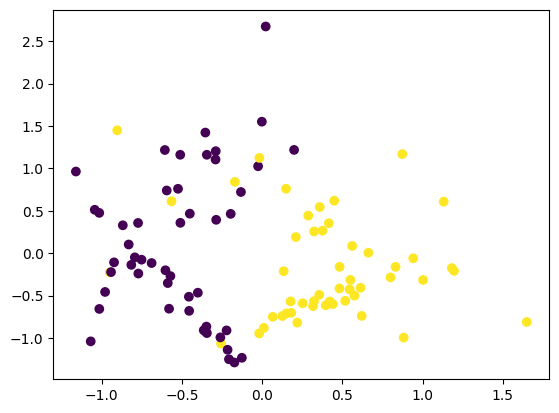

In [3]:
np.random.seed(42)

# Code given in the question
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=2, class_sep=0.5)

# For plotting
plt.scatter(X[:, 0], X[:, 1], c=y)
# Write the code for Q2 a) and b) below. Show your results.
seed = 4
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)
X_train = pd.DataFrame(X_train, dtype="float64")
y_train = pd.Series(y_train, dtype="category")
X_test = pd.DataFrame(X_test, dtype="float64")
y_test = pd.Series(y_test, dtype="category")

In [4]:
criteria = "gini_index"
tree = DecisionTree(criterion= criteria)  # Split based on Inf. Gain
tree.fit(X_train, y_train)
y_hat = tree.predict(X_test)
print("Criteria :", criteria)
print("Accuracy: ", accuracy(y_hat, y_test))
for cls in y_test.unique():
    print("class:" ,cls)
    print("Precision: ", precision(y_hat, y_test, cls))
    print("Recall: ", recall(y_hat, y_test, cls))

Criteria : gini_index
Accuracy:  0.8333338888870371
class: 1
Precision:  0.8125
Recall:  0.8666666666666667
class: 0
Precision:  0.8571428571428571
Recall:  0.8


Accuracy:  0.8333338888870371
Class: 1
  Precision: 0.8571428571428571
  Recall: 0.8

Class: 0
  Precision: 0.8125
  Recall: 0.8666666666666667

[np.float64(0.9000000999999), np.float64(0.92000007999992), np.float64(0.9000000999999), np.float64(0.9000000999999), np.float64(0.89000010999989), np.float64(0.86000013999986), np.float64(0.85000014999985), np.float64(0.85000014999985), np.float64(0.85000014999985), np.float64(0.85000014999985)]
Optimal Depth: 2


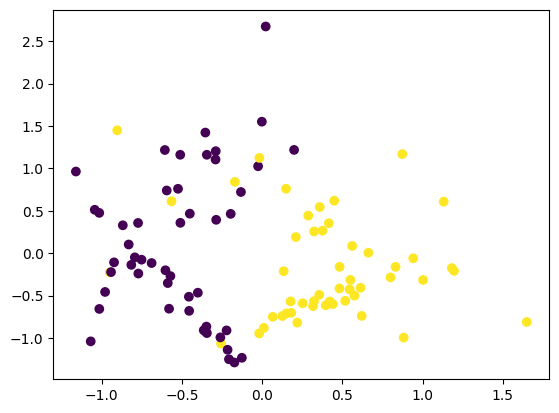

In [5]:
# Code given in the question
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=2, class_sep=0.5)
# For plotting
plt.scatter(X[:, 0], X[:, 1], c=y)
X= pd.DataFrame(X)
y = pd.Series(y, dtype="category")
y_df = pd.DataFrame(y, columns=['new_column_name'])
X = X.join(y_df, rsuffix='_y')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
tree = DecisionTree(criterion="gini_index")
tree.fit(X_train , y_train)
y_hat = tree.predict(X_test)
y_test = y_test.reset_index(drop=True)
print("Accuracy: ", accuracy(pd.Series(y_hat), pd.Series(y_test)))
for cls in y_test.unique():
        recall_value = recall(y_hat, y_test, cls)
        precision_value = precision(y_hat, y_test, cls)
        print(f"Class: {cls}")
        print(f"  Precision: {precision_value}")
        print(f"  Recall: {recall_value}\n")

# Write the code for Q2 a) and b) below. Show your results.

depths = range(1, 11)  # You can adjust the range based on your problem
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)
mean_scores = []

for depth in depths:
    # Inner cross-validation loop for hyperparameter tuning
    inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)
    tree = DecisionTree(criterion="gini_index", max_depth=depth)
    all_y_test = []
    all_y_pred = []
    for train_index, test_index in inner_cv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        tree.fit(X_train, y_train)
        y_pred = tree.predict(X_test)
        y_pred = np.nan_to_num(y_pred, nan=0)
        all_y_test.extend(y_test)
        all_y_pred.extend(y_pred)
    mean_score = accuracy(pd.Series(all_y_test), pd.Series(all_y_pred))
    mean_scores.append(mean_score)

# Find the depth with the highest mean cross-validation score
print(mean_scores)
optimal_depth = depths[np.argmax(mean_scores)]
print(f"Optimal Depth: {optimal_depth}")

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tree.base import DecisionTree
from metrics import *
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

np.random.seed(42)

# Reading the data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
data = pd.read_csv(url, sep='\s+', header=None,
                 names=["mpg", "cylinders", "displacement", "horsepower", "weight",
                        "acceleration", "model year", "origin", "car name"])

# Clean the above data by removing redundant columns and rows with junk values
# Compare the performance of your model with the decision tree module from scikit learn


data = data.drop('model year', axis=1)
data = data.drop('car name', axis=1)
data = data.drop('origin', axis=1)
data = data.drop('cylinders', axis=1)
data = data.apply(pd.to_numeric, errors='coerce')


data = data.dropna()


mpg_column = data.pop('mpg')
data['mpg'] = mpg_column


X = data.iloc[:, :-1]
Y = data.iloc[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

X

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504.0,12.0
1,350.0,165.0,3693.0,11.5
2,318.0,150.0,3436.0,11.0
3,304.0,150.0,3433.0,12.0
4,302.0,140.0,3449.0,10.5
...,...,...,...,...
393,140.0,86.0,2790.0,15.6
394,97.0,52.0,2130.0,24.6
395,135.0,84.0,2295.0,11.6
396,120.0,79.0,2625.0,18.6


In [9]:
# Fitting and testing on our decision tree classifier.
tree = DecisionTree(criterion="MSE", max_depth=5)  
tree.fit(X_train, Y_train)
y_hat = tree.predict(X_test)

print("\nRoot Mean Square Error of custom decision tree regressor:", round(rmse(y_hat, Y_test),2))
print("Mean Absolute Error of custom decision tree regressor: ", round(mae(y_hat, Y_test),2),"\n")
# tree.plot()



# Fitting and testing on our sklear decision tree classifier.
tree_sklearn = DecisionTreeRegressor(max_depth=5, criterion="friedman_mse")
tree_sklearn.fit(X_train, Y_train)
y_hat_sk = tree_sklearn.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, y_hat_sk))
print(f"Root Mean Square Error of sklearn decision tree regressor: {rmse:.2f}")

mae = mean_absolute_error(Y_test, y_hat_sk)
print(f"Mean Absolute Error of sklearn decision tree regressor: {mae:.2f}")


Root Mean Square Error of custom decision tree regressor: 11.53
Mean Absolute Error of custom decision tree regressor:  9.41 

Root Mean Square Error of sklearn decision tree regressor: 4.77
Mean Absolute Error of sklearn decision tree regressor: 3.50


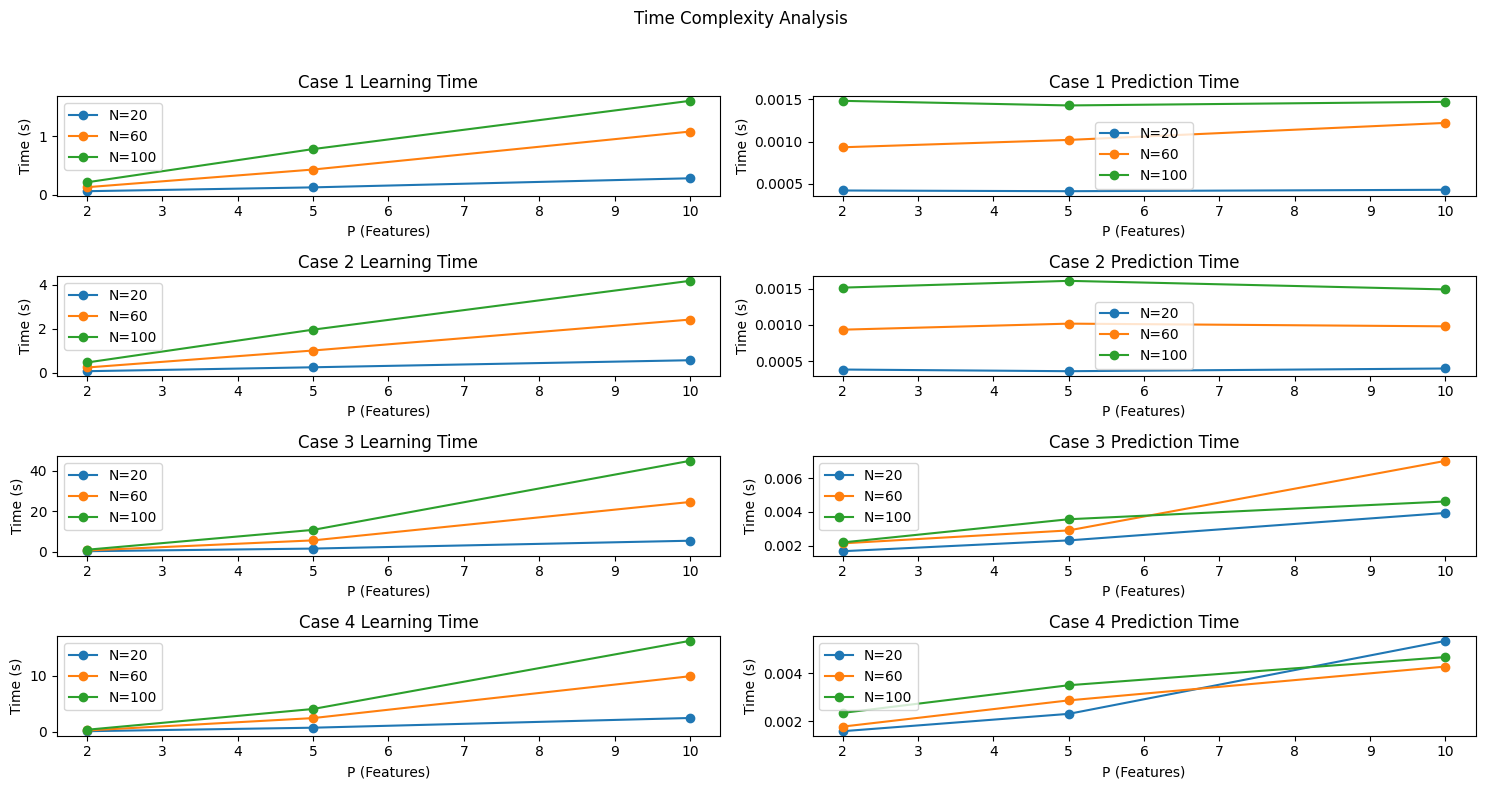

In [7]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from tree.base import DecisionTree
from metrics import *

np.random.seed(42)
num_average_time = 10  # Number of times to run each experiment to calculate the average values

# Function to create fake data
def generate_fake_data(N, P, case):
    if case == 1:
        X = pd.DataFrame(np.random.randn(N, P))
        y = pd.Series(np.random.randn(N))
    elif case == 2:
        X = pd.DataFrame(np.random.randn(N, P))
        y = pd.Series(np.random.randint(P, size=N), dtype="category")
    elif case == 3:
        X = pd.DataFrame({i: pd.Series(np.random.randint(P, size=N), dtype="category") for i in range(P)})
        y = pd.Series(np.random.randint(P, size=N), dtype="category")
    elif case == 4:
        X = pd.DataFrame({i: pd.Series(np.random.randint(P, size=N), dtype="category") for i in range(P)})
        y = pd.Series(np.random.randn(N))
    else:
        raise ValueError("Invalid case number")

    return X, y

# Function to calculate average time (and std) taken by fit() and predict()
def measure_learning_time(X_train, y_train, case):
    start_time = time.time()
    if case in [1, 4]:
        criterion = "MSE"
    else:
        criterion = "gini_index"
    
    tree = DecisionTree(criterion=criterion)
    tree.fit(X_train, y_train)
    
    learning_time = time.time() - start_time
    return learning_time, tree

# Measuring prediction time
def measure_prediction_time(tree, X_test):
    start_time = time.time()
    y_pred = tree.predict(X_test)
    
    prediction_time = time.time() - start_time
    return prediction_time


Ns = [20, 60, 100]
Ms = [2, 5, 10]
cases = [1, 2, 3, 4]
learn_time = []
pred_time = []

for case in cases:
    case_learn_time = []
    case_pred_time = []
    
    for N in Ns:
        learn_times_N = []
        pred_times_N = []
        
        for M in Ms:
            X, y = generate_fake_data(N, M, case)
            
            X_train, X_test = X[:int(0.7*N)], X[int(0.7*N):]
            y_train, y_test = y[:int(0.7*N)], y[int(0.7*N):]
            
            learning_time, trained_tree = measure_learning_time(X_train, y_train, case)
            learn_times_N.append(learning_time)
            
            prediction_time = measure_prediction_time(trained_tree, X_test)
            pred_times_N.append(prediction_time)
        
        case_learn_time.append(learn_times_N)
        case_pred_time.append(pred_times_N)
    
    learn_time.append(case_learn_time)
    pred_time.append(case_pred_time)

# Function to plot the results
fig, axes = plt.subplots(nrows=len(cases), ncols=2, figsize=(15, 8))
fig.suptitle('Time Complexity Analysis')

for i, case in enumerate(cases):
    axes[i, 0].set_title(f"Case {case} Learning Time")
    for j, N in enumerate(Ns):
        axes[i, 0].plot(Ms, learn_time[i][j], marker='o', label=f'N={N}')
    axes[i, 0].set_xlabel('P (Features)')
    axes[i, 0].set_ylabel('Time (s)')
    axes[i, 0].legend()

    axes[i, 1].set_title(f"Case {case} Prediction Time")
    for j, N in enumerate(Ns):
        axes[i, 1].plot(Ms, pred_time[i][j], marker='o', label=f'N={N}')
    axes[i, 1].set_xlabel('P (Features)')
    axes[i, 1].set_ylabel('Time (s)')
    axes[i, 1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
